In [20]:
from google.colab import drive 
drive.mount('/mntDrive') 
!ls "/mntDrive/My Drive/Colab Notebooks"

Drive already mounted at /mntDrive; to attempt to forcibly remount, call drive.mount("/mntDrive", force_remount=True).
 ApacheSpark				    Linear-Regression.ipynb
 Apriori-Algorithm.ipynb		    Mean-Square-Method.ipynb
 Apriori-ARM-Assignment.ipynb		    pima1.csv
'car data.csv'				    Real-Estate-Pricing.ipynb
 Cosmetics.xlsx				    real.xlsx
 Introduction-To-Data-PreProcessing.ipynb   salary_data.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_excel('/mntDrive/My Drive/Colab Notebooks/real.xlsx')

In [23]:
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [24]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [25]:
df.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [26]:
df.isnull().values.any()

False

In [27]:
(df['beds'] == 0).sum(), (df['baths'] == 0).sum(), (df['sq__ft'] == 0).sum(), (df['price'] == 0).sum()

(108, 108, 171, 0)

In [28]:
z_field = ['beds', 'baths', 'sq__ft']
df.non_zero = df.copy()
df[z_field] = df[z_field].replace(0, np.nan)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [0]:
df[z_field] = df[z_field].fillna(df.non_zero.mean())

In [30]:
(df['beds'] == 0).sum(), (df['baths'] == 0).sum(), (df['sq__ft'] == 0).sum(), (df['price'] == 0).sum()

(0, 0, 0, 0)

In [31]:
df['street'].nunique()

981

In [32]:
df['city'].nunique()

39

In [0]:
maxMin = df.groupby(['city']).agg({'price': [np.min,np.max]})

In [36]:
print(maxMin)

                  price        
                   amin    amax
city                           
ANTELOPE         115000  408431
AUBURN           260000  560000
CAMERON PARK     119000  425000
CARMICHAEL       139500  668365
CITRUS HEIGHTS    30000  305000
COOL             300000  300000
DIAMOND SPRINGS  216033  216033
EL DORADO        205000  289000
EL DORADO HILLS  235738  879000
ELK GROVE         71000  510000
ELVERTA          126000  140000
FAIR OAKS        142500  680000
FOLSOM           200000  636000
FORESTHILL       194818  194818
GALT             106716  420000
GARDEN VALLEY    490000  490000
GOLD RIVER       299000  528000
GRANITE BAY      600000  760000
GREENWOOD        395000  395000
LINCOLN            1551  512000
LOOMIS           295000  839000
MATHER           237800  237800
MEADOW VISTA     230000  230000
NORTH HIGHLANDS   63000  224252
ORANGEVALE       183200  475000
PENRYN           506688  506688
PLACERVILLE      205000  677048
POLLOCK PINES    175000  280908
RANCHO C

In [0]:
import seaborn as sns

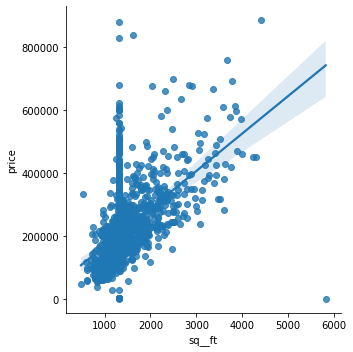

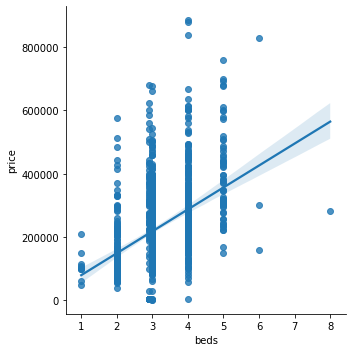

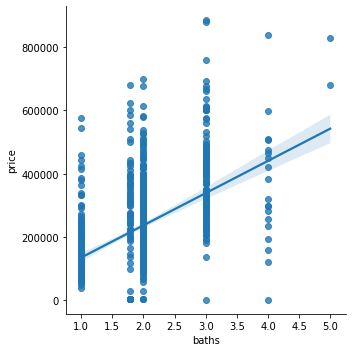

In [38]:
sns.lmplot(x='sq__ft', y='price', data=df)
plt.show()
sns.lmplot(x='beds', y='price', data=df)
plt.show()
sns.lmplot(x='baths', y='price', data=df)
plt.show()

In [39]:
df.corr(method ='kendall')

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.018953,-0.005025,-0.016095,-0.067694,-0.080830,-0.364485
beds,0.018953,1.000000,0.615725,0.528635,0.322866,-0.115128,0.018372
baths,-0.005025,0.615725,1.000000,0.535217,0.366823,-0.073400,0.068689
sq__ft,-0.016095,0.528635,0.535217,1.000000,0.415124,-0.083057,0.051609
price,-0.067694,0.322866,0.366823,0.415124,1.000000,-0.018218,0.129167
latitude,-0.080830,-0.115128,-0.073400,-0.083057,-0.018218,1.000000,0.281511
longitude,-0.364485,0.018372,0.068689,0.051609,0.129167,0.281511,1.000000


In [40]:
df.corr().unstack().sort_values(ascending = False).drop_duplicates()

longitude  longitude    1.000000
sq__ft     baths        0.666713
beds       baths        0.664115
sq__ft     beds         0.650869
price      sq__ft       0.525367
baths      price        0.475334
price      beds         0.412636
latitude   longitude    0.387925
price      longitude    0.284485
baths      longitude    0.132186
beds       longitude    0.054626
longitude  sq__ft       0.044055
beds       zip         -0.038355
baths      latitude    -0.039411
price      latitude    -0.039573
zip        sq__ft      -0.043852
baths      zip         -0.088795
beds       latitude    -0.093180
price      zip         -0.093353
sq__ft     latitude    -0.159076
latitude   zip         -0.290389
zip        longitude   -0.539904
dtype: float64

In [41]:
covariance = np.cov(df['sq__ft'], df['price'])
print(covariance)

[[3.75061406e+05 4.45187121e+07]
 [4.45187121e+07 1.91451054e+10]]


In [0]:
X = df['sq__ft'].values.reshape(-1,1)
Y = df['price']

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

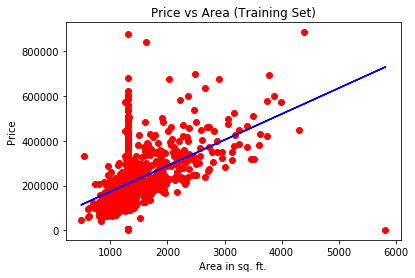

In [45]:
train = plt
train.scatter(x_train, y_train, color = 'red')
train.plot(x_train, regressor.predict(x_train), color = 'blue')
train.title('Price vs Area (Training Set)')
train.xlabel('Area in sq. ft.')
train.ylabel('Price')
train.show()

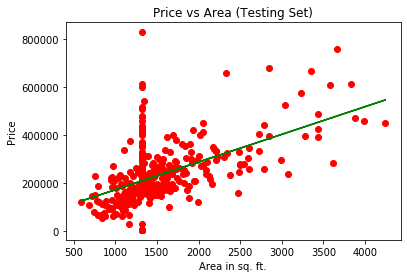

In [46]:
test = plt
test.scatter(x_test, y_test, color = 'red')
test.plot(x_test, regressor.predict(x_test), color = 'green')
test.title('Price vs Area (Testing Set)')
test.xlabel('Area in sq. ft.')
test.ylabel('Price')
test.show()

In [47]:
y_pred = regressor.predict(x_test)
print('Actual values' + '\tPredicted Values' +'\tError')
err = y_test - y_pred
for i in zip(y_test, y_pred, err):
  print(i)

Actual values	Predicted Values	Error
(211500, 166719.38113072014, 44780.61886927986)
(395100, 436144.0921005355, -41044.09210053552)
(129000, 186467.18463515153, -57467.18463515153)
(124000, 187391.05848331208, -63391.05848331208)
(176850, 227810.53934033538, -50960.53934033538)
(480000, 209092.47999940577, 270907.5200005942)
(220000, 166950.34959276026, 53049.65040723974)
(610000, 470558.3929445154, 139441.6070554846)
(362305, 265111.9459598169, 97193.05404018308)
(325000, 328281.8203277933, -3281.820327793306)
(130000, 196860.7654269575, -66860.76542695751)
(215000, 216146.63200730865, -1146.6320073086536)
(339000, 241437.67860070322, 97562.32139929678)
(270000, 291673.31909443217, -21673.31909443217)
(300567, 239358.96244234202, 61208.03755765798)
(108750, 175265.21422620508, -66515.21422620508)
(145846, 235432.49858765976, -89586.49858765976)
(4897, 209092.47999940577, -204195.47999940577)
(460000, 518253.3803558029, -58253.38035580289)
(339000, 185196.85809393082, 153803.141906069

In [48]:
regressor.score(x_test,y_test)

0.32739641886802984

In [0]:
xM = df[['sq__ft', 'beds', 'baths']]
yM = df['price']

In [0]:
from sklearn.model_selection import train_test_split
xM_train, xM_test, yM_train, yM_test = train_test_split(xM, yM, test_size = 1/3, random_state = 0)

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xM_train, yM_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
yM_pred = regressor.predict(xM_test)
print('Actual values' + '\tPredicted Values' +'\tError')
errM = yM_test - yM_pred
for i in zip(yM_test, yM_pred, errM):
  print(i)

Actual values	Predicted Values	Error
(211500, 135354.45636553367, 76145.54363446633)
(395100, 430460.3625492493, -35360.362549249316)
(129000, 204109.8992577062, -75109.89925770619)
(124000, 210920.30936645318, -86920.30936645318)
(176850, 237533.83110206499, -60683.831102064985)
(480000, 280962.0789088955, 199037.9210911045)
(220000, 135506.5336325943, 84493.4663674057)
(610000, 453119.87534128444, 156880.12465871556)
(362305, 255892.20869185374, 106412.79130814626)
(325000, 359440.27883193083, -34440.27883193083)
(130000, 210953.37627543494, -80953.37627543494)
(215000, 180303.19359751928, 34696.806402480725)
(339000, 246506.3898586427, 92493.61014135729)
(270000, 329133.9309623152, -59133.93096231518)
(300567, 238935.5934145925, 61631.4065854075)
(108750, 190532.05076476076, -81782.05076476076)
(145846, 236350.27987456165, -90504.27987456165)
(4897, 207392.17216829883, -202495.17216829883)
(460000, 478321.72994880204, -18321.729948802036)
(339000, 153722.7387708892, 185277.261229110

In [53]:
regressor.score(xM_test,yM_test)

0.3532101742163726